I. DATA PREPOCESSING

CHANGER LES DONNEES, IDENTIFIER LES DONNEES MANQUANTES

In [1059]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age: 177 valeurs manquantes

Cabin: 687 valeurs manquantes

Embarked: 2 valeurs manquantes

LISTER LES DONNEES ET LES VALEURS ATTENDUES - AFFICHER LES DATA TYPES

In [1060]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


IDENTIFIER LES VALEURS ABERRANTES

CHOISIR LES METHODES DE TRAITEMENT POUR LES DONNEES ABERRANTS

Afficher les colonnes avec valeurs manquantes

Remplacer la valeur 'Age' par la mediane 

Remplacer les valeurs catégorielles (ex : Embarked) par la valeur la plus fréquente (mode)

Remplacer les NaN d’une colonne par une valeur fixe (Cabin)

In [1061]:

train['Age'] = train['Age'].fillna(train['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

train['Cabin'] = train['Cabin'].fillna('Inconnu')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Inconnu,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Inconnu,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Inconnu,S


IDENTIFIER LES DOUBLONS - pas de doublon dans les données

REGARDER LES TYPES DE DONNEES: CONVERTIR SI BESOIN EN VALEUR NUMERIQUE SI LE TYPE EST OBJECT POUR DES COLONNES DE NOMBRE

In [1062]:
from sklearn.preprocessing import LabelEncoder

train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
train["Embarked"] = train["Embarked"].map({"S": 0, "C": 1, "Q": 2})

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Inconnu,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Inconnu,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Inconnu,0


II. FEATURES

HYPOTHESES

-Taux de survie pour tous les passagers

FEMMES / HOMMES

-Répartition femmes / hommes dans le total des passagers

-Répartition femmes / hommes parmi les survécus

-Taux de survie entre les sexes


CLASSE DE BILLET:

-Répartition hommes/femmes selon les classes (Pclass) dans le total des passagers

-Répartition femme/homme parmi les survivants selon les classes

-Survie selon les catégories de prix de billet


L'AGE:

-Repartition des âges dans le total des passagers

-l'age le plus frèquente entre tous les voyageurs / entre les survécus

-Répartition selon l'age femmes / hommes dans le total des passagers

-Répartition selon l'age femmes / hommes parmi les survivants

-Répartition selon l'age et selon classe de billet femmes / hommes dans le total des passagers

-Répartition selon l'age et selon classe de billet femmes / hommes parmi les survivants

-dans l'age, quantité les enfants (>16) dans les données/survécu

-repartition age entre femme homme entre total des pasagers et entre passagers survécus entre l'age 0-3 ans




RELATIONS FAMILIALES

-Repartition selon sibsp: selon nombre des sibsp dans le total des passagers

-Repartition selon sibsp: selon nombre des sibsp parmi les survécus

-Repartition selon parch: selon nombre des parch dans le total des passagers

-Repartition selon parch: selon nombre des parch parmi les survécus

-Repartition selon sibsp: selon nombre des sibsp parmi les survécus et sexe

-Repartition selon parch: selon nombre des parch parmi les survécus et sexe

-taux de survie par nombre de Parch (tous les passagers)

-taux de survie par nombre de Parch (tous les passagers)

-Proportion (%) de survivants par Parch

-Proportion (%) de survivants par SibSp




SURVIE SELON PORT D'EMBARQUEMENT

-Survie selon le port d'embarquement, par classe de billet

-Survie des femmes selon le port d'embarquement


In [1063]:
# Calcul du taux de survie global
taux_survie = train['Survived'].mean()

# Affichage
print(f"Taux de survie pour tous les passagers : {taux_survie:.3f} ({taux_survie*100:.1f} %)")


Taux de survie pour tous les passagers : 0.384 (38.4 %)


In [1064]:
sex_counts = train['Sex'].value_counts()
print(sex_counts)

Sex
1    577
0    314
Name: count, dtype: int64


FEMMES / HOMMES

-Répartition femmes / hommes dans le total des passagers

-Répartition femmes / hommes parmi les survécus

-Taux de survie entre les sexes


Sex
1    577
0    314
Name: count, dtype: int64


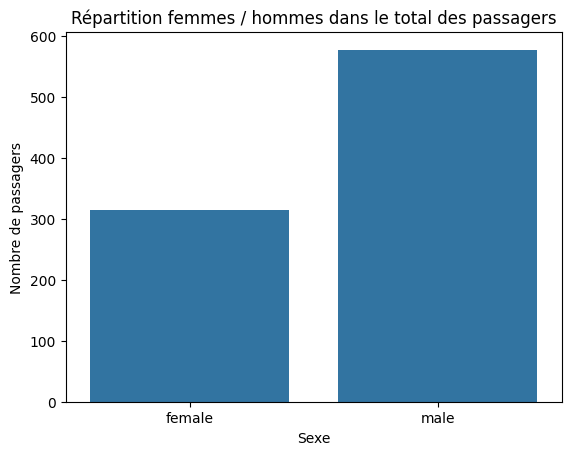

Sex
0    233
1    109
Name: count, dtype: int64


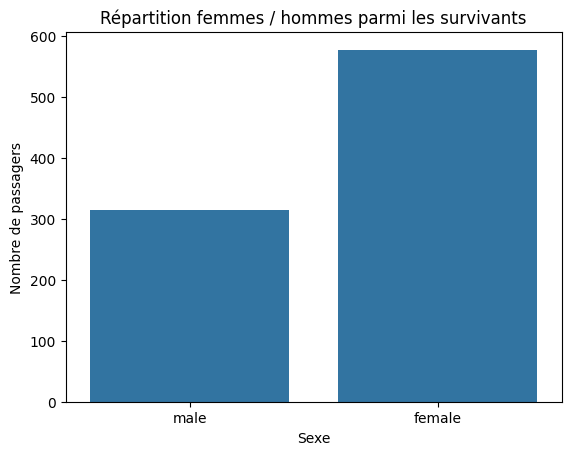

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


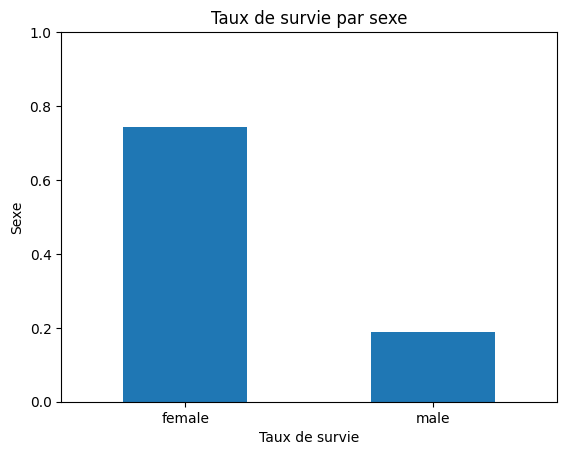

In [1065]:
tous_by_sex = train['Sex'].value_counts()
print(tous_by_sex)

sns.countplot(x='Sex', data=train)
plt.title("Répartition femmes / hommes dans le total des passagers")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.xticks(ticks=[0,1], labels=['female', 'male'])
plt.show()

survived_by_sex = train[train['Survived'] == 1]['Sex'].value_counts()
print(survived_by_sex)

sns.countplot(x='Sex', data=train)
plt.title("Répartition femmes / hommes parmi les survivants")
plt.xlabel("Sexe")
plt.ylabel("Nombre de passagers")
plt.xticks(ticks=[0,1], labels=['male', 'female'])
plt.show()

#Taux de survie
survival_rate_by_sex = train.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)

survival_rate_by_sex.plot(kind='bar')
plt.title("Taux de survie par sexe")
plt.xlabel("Taux de survie")
plt.ylabel("Sexe")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.xticks(ticks=[0,1], labels=['female', 'male'])
plt.show()

#Taux de survie entre les sexes

CLASSE DE BILLET:

-Répartition hommes/femmes selon les classes (Pclass) dans le total des passagers

-Répartition femme/homme parmi les survivants selon les classes

-Survie selon les catégories de prix de billet

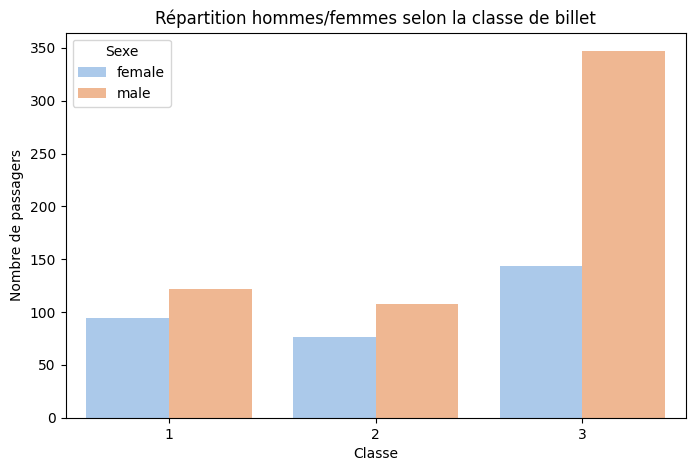

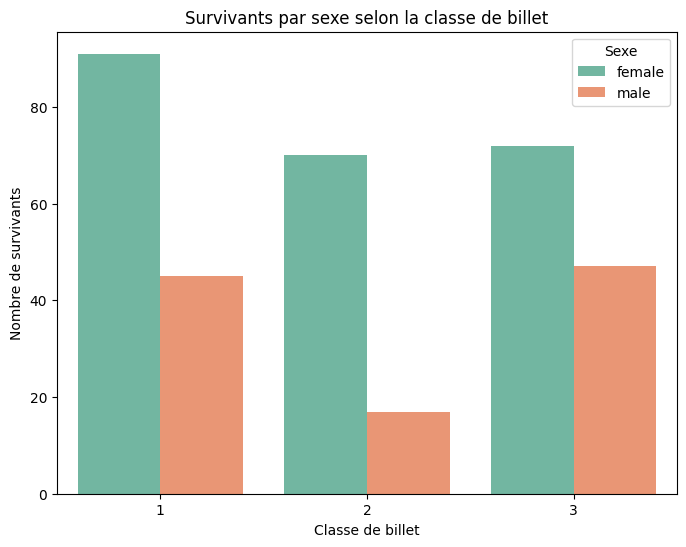

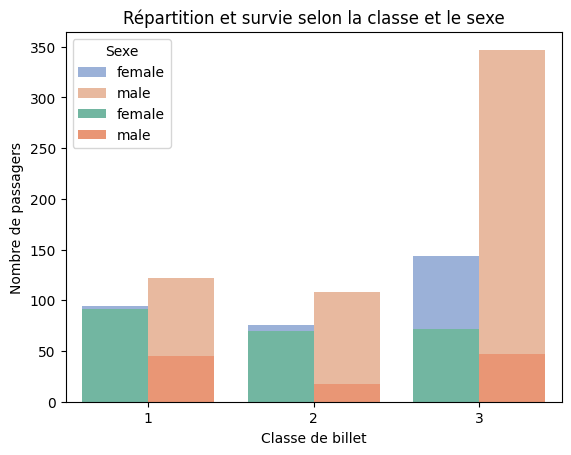

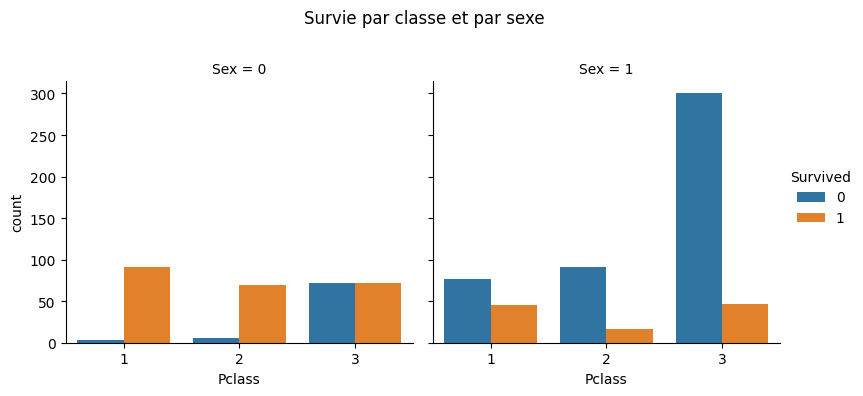

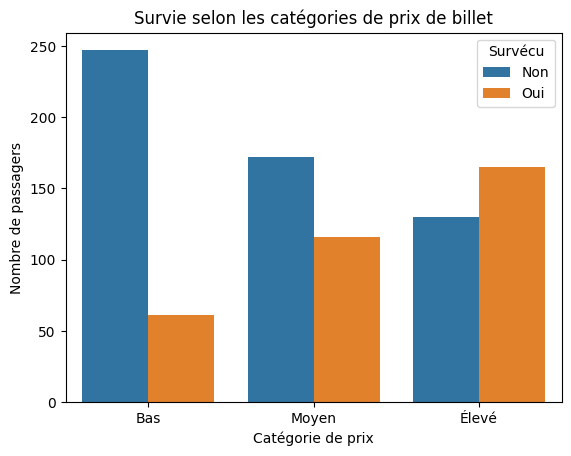

In [1066]:
train['Sex_label'] = train['Sex'].map({0: 'female', 1: 'male'})

plt.figure(figsize=(8,5))
sns.countplot(data=train, x='Pclass', hue='Sex_label', palette='pastel')
plt.title("Répartition hommes/femmes selon la classe de billet")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.legend(title="Sexe")

plt.show()

survivants = train[train['Survived'] == 1]

plt.figure(figsize=(8,6))
sns.countplot(data=survivants, x='Pclass', hue='Sex_label', palette='Set2')
plt.title("Survivants par sexe selon la classe de billet")
plt.xlabel("Classe de billet")
plt.ylabel("Nombre de survivants")
plt.legend(title="Sexe")
plt.show()

#Overview
sns.countplot(data=train, x='Pclass', hue='Sex_label', palette='muted', alpha=0.6)
sns.countplot(data=train[train['Survived'] == 1], x='Pclass', hue='Sex_label', palette='Set2')

plt.title("Répartition et survie selon la classe et le sexe")
plt.xlabel("Classe de billet")
plt.ylabel("Nombre de passagers")
plt.legend(title="Sexe", loc="upper left")
plt.show()

#Overview 2.
sns.catplot(x="Pclass", hue="Survived", col="Sex", data=train, kind="count", height=4, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survie par classe et par sexe")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

train["Fare_category"] = pd.qcut(train["Fare"], q=3, labels=["Bas", "Moyen", "Élevé"])

sns.countplot(x="Fare_category", hue="Survived", data=train)
plt.title("Survie selon les catégories de prix de billet")
plt.xlabel("Catégorie de prix")
plt.ylabel("Nombre de passagers")
plt.legend(title="Survécu", labels=["Non", "Oui"])
plt.show()

L'AGE:

-Repartition des âges dans le total des passagers

-l'age le plus frèquente entre tous les voyageurs / entre les survécus

-Répartition selon l'age femmes / hommes dans le total des passagers

-Répartition selon l'age femmes / hommes parmi les survivants

-Répartition selon l'age et selon classe de billet femmes / hommes dans le total des passagers

-Répartition selon l'age et selon classe de billet femmes / hommes parmi les survivants

-dans l'age, quantité les enfants (>16) dans les données/survécu

-repartition age entre femme homme entre total des pasagers et entre passagers survécus entre l'age 0-3 ans


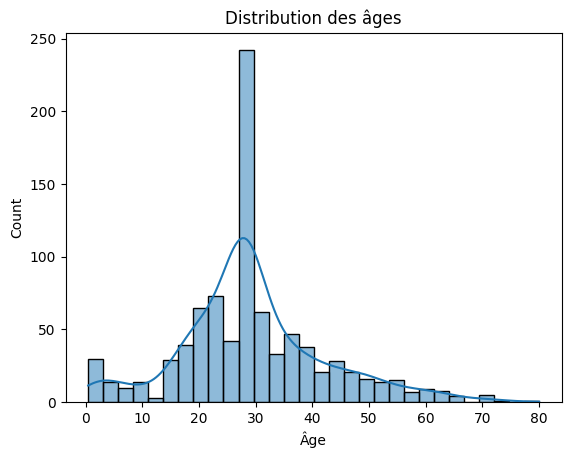

Âge le plus fréquent parmi tous les passagers : 28.0
Âge le plus fréquent parmi les survivants : 28.0


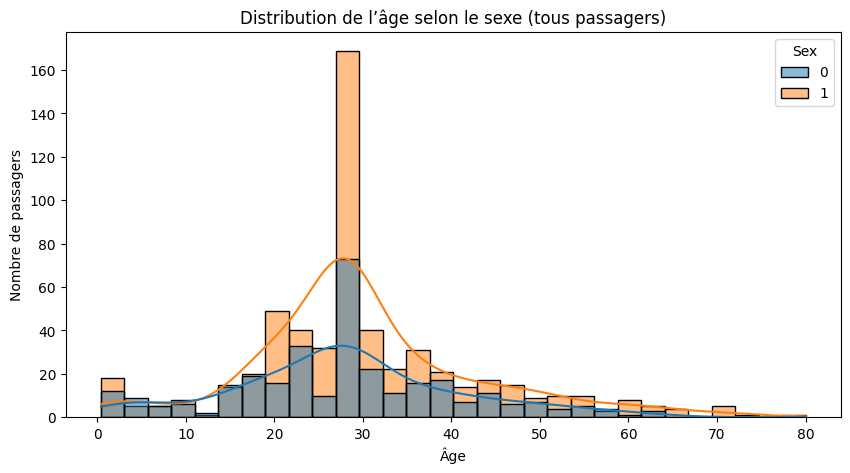

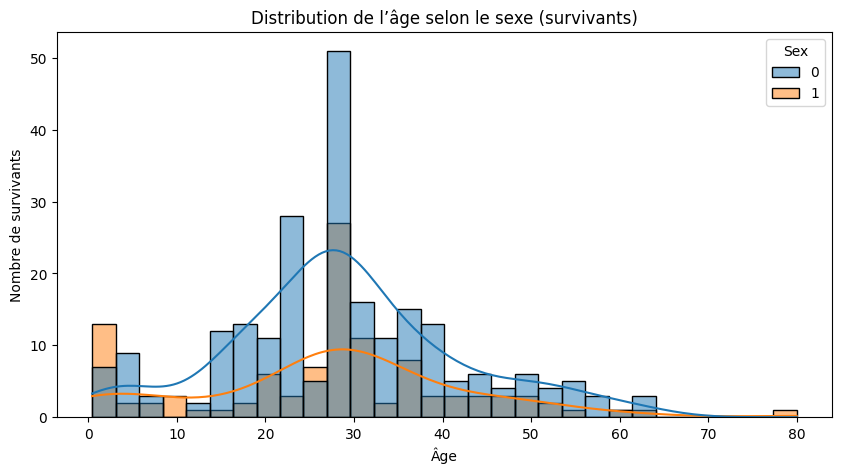

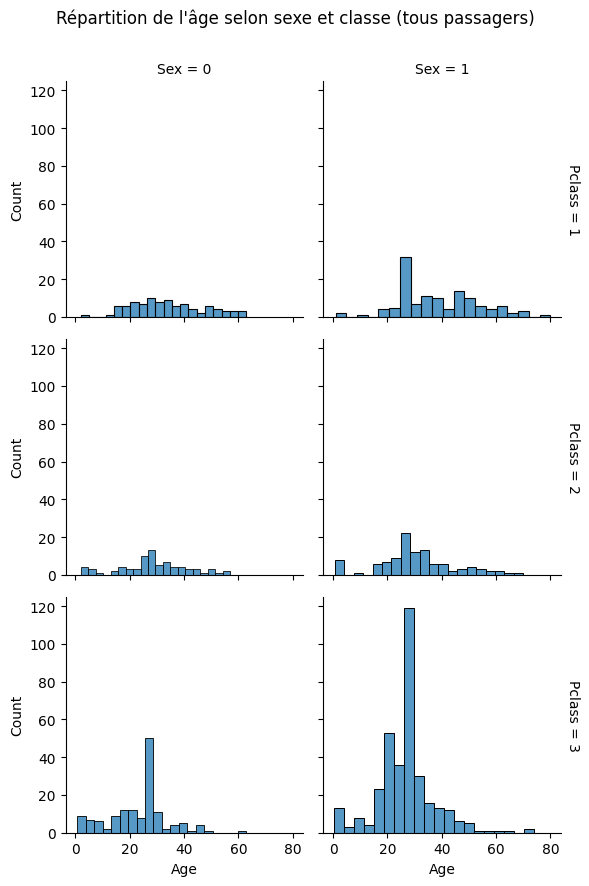

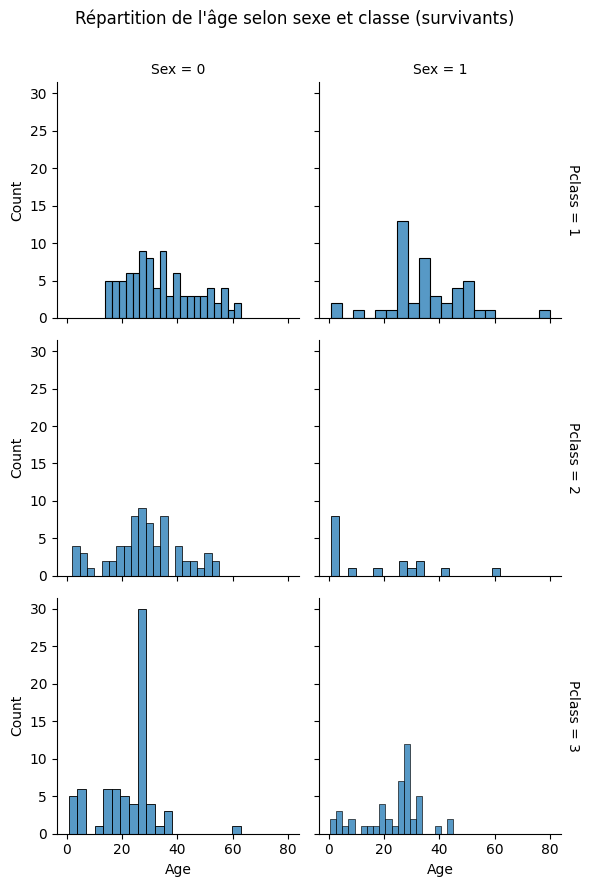

Enfants (<=16 ans) dans le jeu de données : 100
Enfants (<=16 ans) ayant survécu : 55


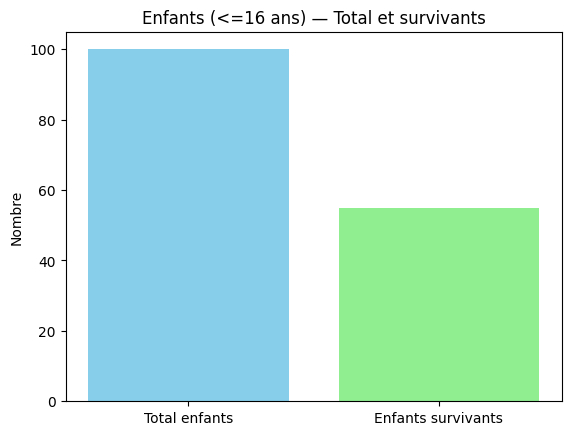

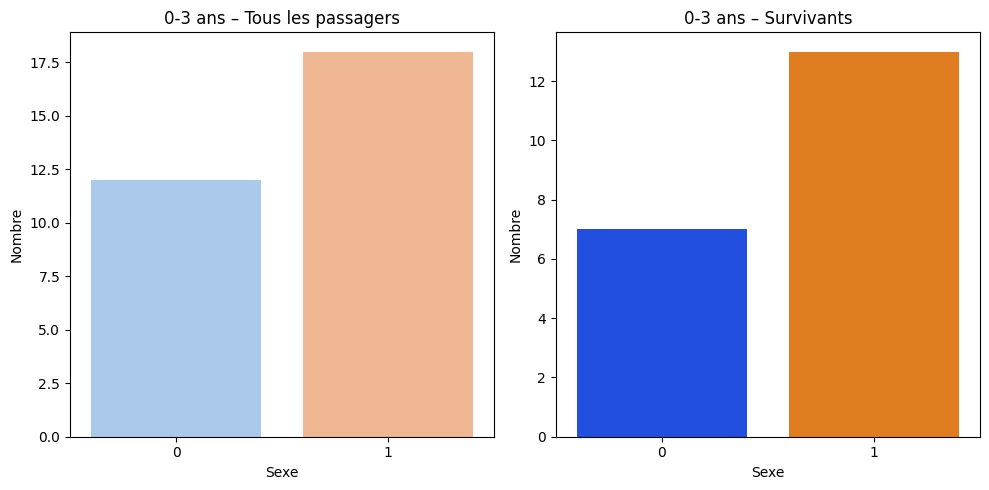

In [1067]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.show()

#Âge le plus fréquent parmi tous les passagers 
mode_age_total = train['Age'].mode().values[0]
print(f"Âge le plus fréquent parmi tous les passagers : {mode_age_total}")

#Âge le plus fréquent parmi les survivants
mode_age_surv = train[train['Survived']==1]['Age'].mode().values[0]
print(f"Âge le plus fréquent parmi les survivants : {mode_age_surv}")

plt.figure(figsize=(10,5))
sns.histplot(data=train, x="Age", hue="Sex", bins=30, kde=True)
plt.title("Distribution de l’âge selon le sexe (tous passagers)")
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=train[train['Survived'] == 1], x="Age", hue="Sex", bins=30, kde=True)
plt.title("Distribution de l’âge selon le sexe (survivants)")
plt.xlabel("Âge")
plt.ylabel("Nombre de survivants")
plt.show()

g = sns.FacetGrid(train, row='Pclass', col='Sex', margin_titles=True, height=3)
g.map(sns.histplot, "Age", bins=20)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Répartition de l\'âge selon sexe et classe (tous passagers)')
plt.show()

g = sns.FacetGrid(train[train['Survived'] == 1], row='Pclass', col='Sex', margin_titles=True, height=3)
g.map(sns.histplot, "Age", bins=20)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Répartition de l'âge selon sexe et classe (survivants)")
plt.show()

enfants = train[train['Age'] <= 16]
nb_enfants_total = enfants.shape[0]
nb_enfants_surv = enfants[enfants['Survived'] == 1].shape[0]

print("Enfants (<=16 ans) dans le jeu de données :", nb_enfants_total)
print("Enfants (<=16 ans) ayant survécu :", nb_enfants_surv)

plt.bar(['Total enfants', 'Enfants survivants'], [nb_enfants_total, nb_enfants_surv], color=['skyblue', 'lightgreen'])
plt.ylabel("Nombre")
plt.title("Enfants (<=16 ans) — Total et survivants")
plt.show()

enfants_0_3 = train[(train['Age'] >= 0) & (train['Age'] <= 3)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=enfants_0_3, x='Sex', hue='Sex', palette='pastel', legend=False, ax=axs[0])
axs[0].set_title("0-3 ans – Tous les passagers")
axs[0].set_ylabel("Nombre")
axs[0].set_xlabel("Sexe")

sns.countplot(data=enfants_0_3[enfants_0_3['Survived'] == 1], x='Sex', hue='Sex', palette='bright', legend=False, ax=axs[1])
axs[1].set_title("0-3 ans – Survivants")
axs[1].set_ylabel("Nombre")
axs[1].set_xlabel("Sexe")

plt.tight_layout()
plt.show()


RELATIONS FAMILIALES

-Repartition selon sibsp: selon nombre des sibsp dans le total des passagers

-Repartition selon sibsp: selon nombre des sibsp parmi les survécus

-Repartition selon parch: selon nombre des parch dans le total des passagers

-Repartition selon parch: selon nombre des parch parmi les survécus

-Repartition selon sibsp: selon nombre des sibsp parmi les survécus et sexe

-Repartition selon parch: selon nombre des parch parmi les survécus et sexe

-taux de survie par nombre de Parch (tous les passagers)

-taux de survie par nombre de Parch (tous les passagers)

-Proportion (%) de survivants par Parch

-Proportion (%) de survivants par SibSp

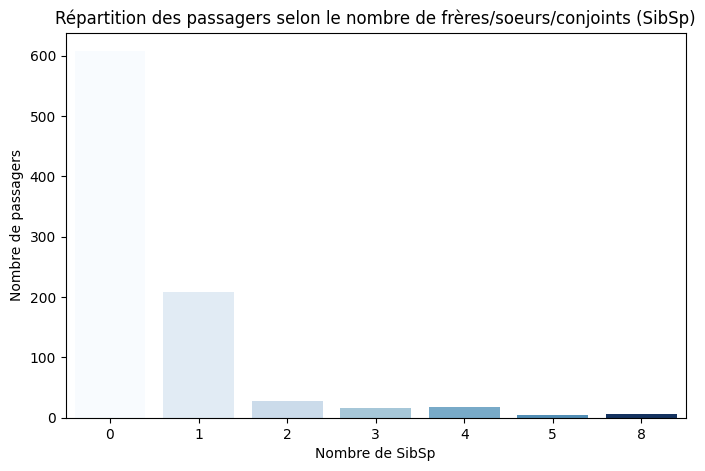

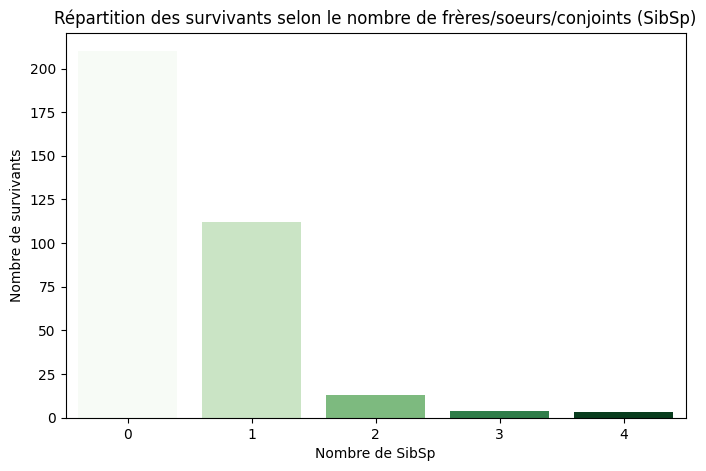

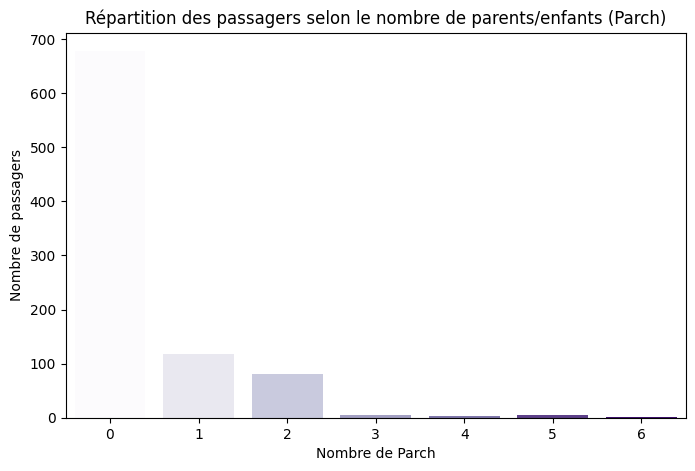

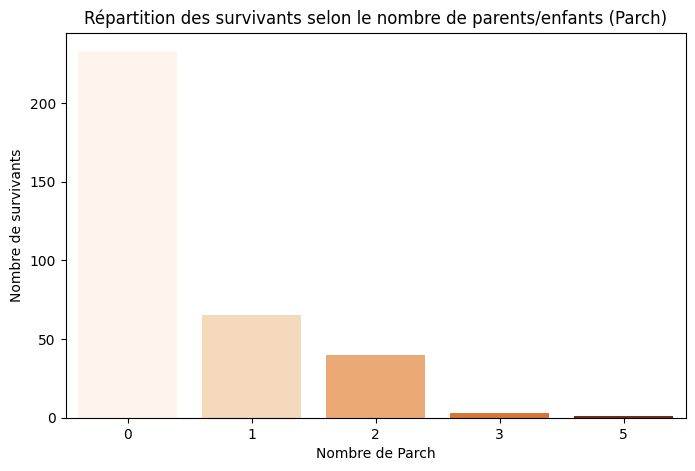

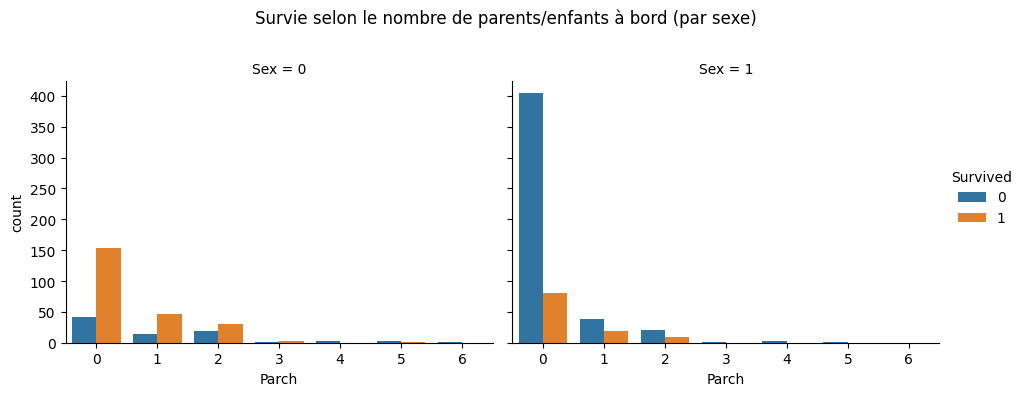

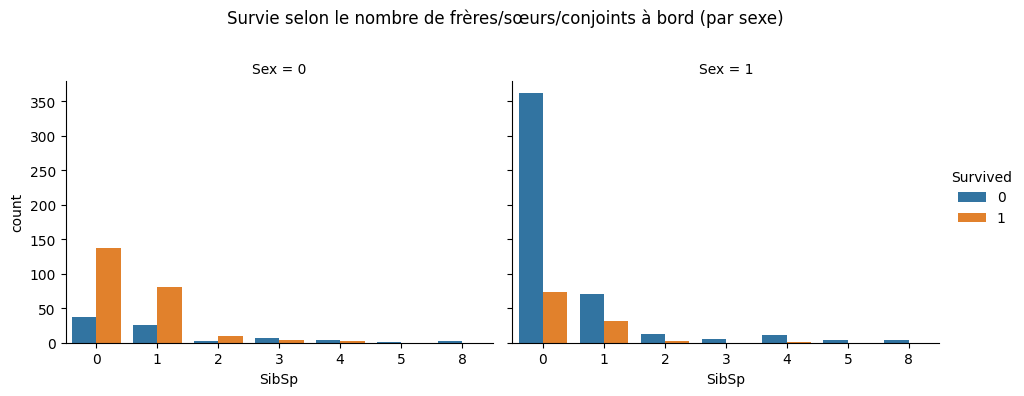

In [1068]:
#Répartition selon SibSp dans le total des passagers

plt.figure(figsize=(8,5))
sns.countplot(data=train, x="SibSp", hue="SibSp", palette="Blues", legend=False
)
plt.title("Répartition des passagers selon le nombre de frères/soeurs/conjoints (SibSp)")
plt.xlabel("Nombre de SibSp")
plt.ylabel("Nombre de passagers")
plt.show()

#Répartition selon SibSp parmi les survivants

plt.figure(figsize=(8,5))
sns.countplot( data=train[train['Survived'] == 1], x="SibSp", hue="SibSp", palette="Greens", legend=False
)
plt.title("Répartition des survivants selon le nombre de frères/soeurs/conjoints (SibSp)")
plt.xlabel("Nombre de SibSp")
plt.ylabel("Nombre de survivants")
plt.show()

#Répartition selon Parch dans le total des passagers

plt.figure(figsize=(8,5))
sns.countplot( data=train, x="Parch", hue="Parch", palette="Purples", legend=False
)
plt.title("Répartition des passagers selon le nombre de parents/enfants (Parch)")
plt.xlabel("Nombre de Parch")
plt.ylabel("Nombre de passagers")
plt.show()

#Répartition selon Parch parmi les survivants

plt.figure(figsize=(8,5))
sns.countplot(
    data=train[train['Survived'] == 1], x="Parch", hue="Parch", palette="Oranges", legend=False
)
plt.title("Répartition des survivants selon le nombre de parents/enfants (Parch)")
plt.xlabel("Nombre de Parch")
plt.ylabel("Nombre de survivants")
plt.show()

#Overview I.

sns.catplot(x="Parch", hue="Survived", col="Sex",
data=train, kind="count", height=4, aspect=1.2)

plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le nombre de parents/enfants à bord (par sexe)")
plt.show() 

#Overview II

sns.catplot(x="SibSp", hue="Survived", col="Sex",
data=train, kind="count", height=4, aspect=1.2)

plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le nombre de frères/sœurs/conjoints à bord (par sexe)")
plt.show()


Taux de survie par nombre de Parch (tous les passagers):
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


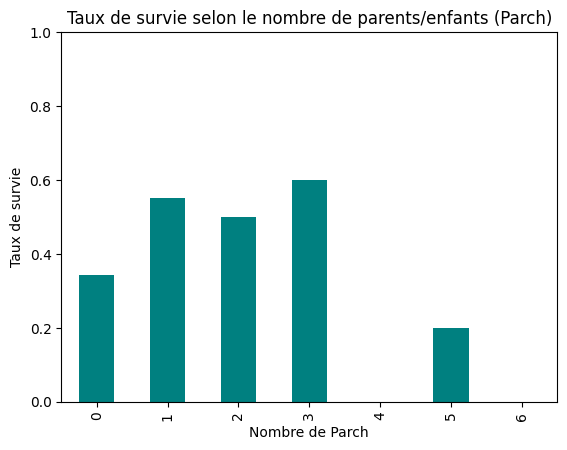

Taux de survie selon SibSp (tous les passagers) :
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


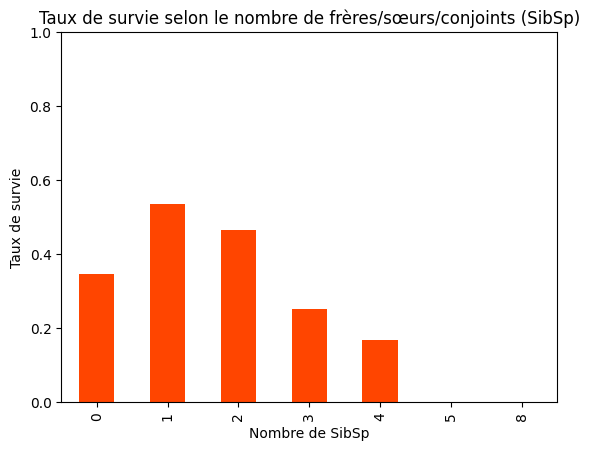

In [1069]:
# Calcul du taux de survie par nombre de Parch (tous les passagers)
taux_survie_parch = train.groupby('Parch')['Survived'].mean()

print("Taux de survie par nombre de Parch (tous les passagers):")
print(taux_survie_parch)

#Pour une visualisation graphique :

import matplotlib.pyplot as plt

taux_survie_parch.plot(kind='bar', color='teal')
plt.title("Taux de survie selon le nombre de parents/enfants (Parch)")
plt.xlabel("Nombre de Parch")
plt.ylabel("Taux de survie")
plt.ylim(0,1)
plt.show()


taux_survie_sibsp = train.groupby('SibSp')['Survived'].mean()
print("Taux de survie selon SibSp (tous les passagers) :\n", taux_survie_sibsp)

taux_survie_sibsp.plot(kind='bar', color='orangered')
plt.title("Taux de survie selon le nombre de frères/sœurs/conjoints (SibSp)")
plt.xlabel("Nombre de SibSp")
plt.ylabel("Taux de survie")
plt.ylim(0, 1)
plt.show()


In [1070]:
# Proportion de survivants selon Parch parmi tous les survivants
proportion_survivants_parch = train[train["Survived"]==1]["Parch"].value_counts(normalize=True).sort_index()
print("Proportion (%) de survivants par Parch (parmi les survivants) :\n", (proportion_survivants_parch*100).round(1))

# Proportion de survivants selon Parch parmi tous les survivants
proportion_survivants_SibSp = train[train["Survived"]==1]["SibSp"].value_counts(normalize=True).sort_index()
print("Proportion (%) de survivants par SibSp (parmi les survivants) :\n", (proportion_survivants_SibSp*100).round(1))

Proportion (%) de survivants par Parch (parmi les survivants) :
 Parch
0    68.1
1    19.0
2    11.7
3     0.9
5     0.3
Name: proportion, dtype: float64
Proportion (%) de survivants par SibSp (parmi les survivants) :
 SibSp
0    61.4
1    32.7
2     3.8
3     1.2
4     0.9
Name: proportion, dtype: float64


SURVIE SELON PORT D'EMBARQUEMENT

-Survie selon le port d'embarquement, par classe de billet

-Survie des femmes selon le port d'embarquement

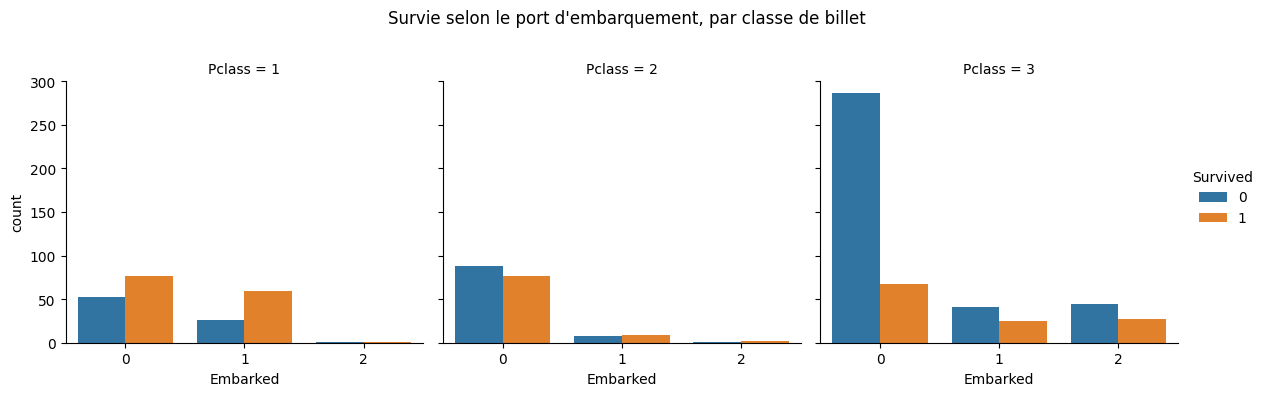

          Femmes survivantes  Femmes totales  Taux de survie (%)
Embarked                                                        
C                         64              73                87.7
Q                         27              36                75.0
S                        140             203                69.0


In [1071]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Embarked", hue="Survived", col="Pclass", data=train, kind="count", height=4, aspect=1)

plt.subplots_adjust(top=0.8)
plt.suptitle("Survie selon le port d'embarquement, par classe de billet")
plt.show()

train = pd.read_csv('train.csv')

# Filtrer pour ne garder que les femmes
femmes = train[train['Sex'] == 'female']

# Nombre total de femmes par embarquement
total_femmes_par_embarquement = femmes.groupby('Embarked').size()

# Nombre de femmes survivantes par embarquement
surv_femmes_par_embarquement = femmes[femmes['Survived'] == 1].groupby('Embarked').size()

# Assembler dans un tableau
resultat = pd.DataFrame({
    'Femmes survivantes': surv_femmes_par_embarquement,
    'Femmes totales': total_femmes_par_embarquement
}).fillna(0).astype(int)

# Ajouter le taux de survie pour information
resultat['Taux de survie (%)'] = (resultat['Femmes survivantes'] / resultat['Femmes totales'] * 100).round(1)

print(resultat)


VERIFIER LES TYPES DE DONNEES

In [1072]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

TROUVER DES HYPOTHESES:

ËTRE FEMME
-AVOIR 28
-ËTRE SANS RELATIONS FAMILIALES
-VOYAGER AU PREMIER CLASSE
-FAIRE L'EMBARQUEMENT A CHERBOURG

EXPORT TRAIN_CLEAN.CSV

In [1073]:
train['Age'] = train['Age'].fillna(train['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

train['Cabin'] = train['Cabin'].fillna('Inconnu')

from sklearn.preprocessing import LabelEncoder

train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
train["Embarked"] = train["Embarked"].map({"S": 0, "C": 1, "Q": 2})


train.columns
#train.head(15)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1074]:
train['family_size'] = train['SibSp'] + df['Parch'] + 1

train['is_alone'] = (train['family_size'] == 1).astype(int)

#print(train.head())

In [1075]:
train.to_csv('train_clean.csv', index=False)

train_clean = pd.read_csv('train_clean.csv')

#train_clean.head(15)

In [1076]:
from sklearn.model_selection import train_test_split 

from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score



data = pd.read_csv('train_clean.csv')

data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
 
X = data.drop('Survived', axis=1)
print(X.columns)
y = data['Survived'] 
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


svc_linear_model = LinearSVC()

svc_linear_model.fit(X_train, y_train) 

y_pred_svc_linear = svc_linear_model.predict(X_test) 

accuracy_svc_linear = accuracy_score(y_test, y_pred_svc_linear) 

print(f"Accuracy of SVC: {accuracy_svc_linear:.4f}") 




knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train) 

y_pred_knn = knn_model.predict(X_test) 

accuracy_knn = accuracy_score(y_test, y_pred_knn) 

print(f"Accuracy of K-Nearest Neighbors: {accuracy_knn:.4f}") 




svc_model = SVC(random_state=0)

svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy of SVC : {accuracy_svc:.4f}") 



rf_model = RandomForestClassifier(random_state=0)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'family_size', 'is_alone'],
      dtype='object')
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
Accuracy of SVC: 0.7848
Accuracy of K-Nearest Neighbors: 0.7309
Accuracy of SVC : 0.7220
Accuracy of Random Forest: 0.8386


In [1077]:
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('train_clean.csv')
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

X_final = data.drop('Survived', axis=1)
y_final = data['Survived']

rf_model = RandomForestClassifier(random_state=0)

rf_model.fit(X_final, y_final)

y_pred_rf = rf_model.predict(X_final)

accuracy_rf = accuracy_score(y_final, y_pred_rf)

print(f"Accuracy of Random Forest: {accuracy_rf:.4f}")


Accuracy of Random Forest: 0.9798


NETTOYAGE TEST.CSV

In [1078]:
test = pd.read_csv('test.csv')

print(test.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [1079]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [1080]:
test['Age'] = test['Age'].fillna(test['Age'].median())

test['Fare'] = pd.to_numeric(test['Fare'], errors='coerce')
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

test['Cabin'] = test['Cabin'].fillna('Inconnu')

#test.head()


In [1081]:
from sklearn.preprocessing import LabelEncoder

test["Sex"] = test["Sex"].map({"male": 1, "female": 0})
test["Embarked"] = test["Embarked"].map({"S": 0, "C": 1, "Q": 2})

#test.head()


In [1082]:
test['family_size'] = test['SibSp'] + df['Parch'] + 1

test['is_alone'] = (test['family_size'] == 1).astype(int)

In [1083]:
test.to_csv('test_clean.csv', index=False)

test_clean = pd.read_csv('test_clean.csv')

#test_clean.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier


train = pd.read_csv('train_clean.csv')
X_train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y_train = train['Survived']

test = pd.read_csv('test_clean.csv')
X_test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
passenger_ids = test['PassengerId']

model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

submission = pd.DataFrame({'PassengerId': passenger_ids,'Survived': y_pred})

submission.to_csv('submission.csv', index=False)
